In [ ]:
# imports
import io
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.colors import Normalize
import seaborn as sns
import sklearn as sk
from sklearn import model_selection, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree


In [ ]:
from google.colab import files
# upload the three datasets here
# link to first dataset:
# https://drive.google.com/file/d/14KAjJTI-plzAtAx6Lx2-_vVUm13tPAoT/view?usp=sharing
# link to second dataset:
# https://drive.google.com/file/d/1vKi2FAEfP47jxrlkC44ZEQZpVJyWs9bd/view?usp=sharing
# link to third datset:
# https://drive.google.com/file/d/1v9bInrHY-ZacBAvrGxbouZJ0yv3WpwtH/view?usp=sharing
uploaded = files.upload()

Saving CityLatLongAQI.csv to CityLatLongAQI.csv
Saving FinalDataset.csv to FinalDataset.csv
Saving FinalDatasetEnergyConsumption.csv to FinalDatasetEnergyConsumption.csv


In [ ]:
# firstDataset <- Dataset containing only AQI, latitude, longitude
firstDataset = pd.read_csv(io.BytesIO(uploaded['FinalDataset.csv']))
# secondDataset <- Dataset containing AQI, latitude, longitude, population
secondDataset = pd.read_csv(io.BytesIO(uploaded['FinalDataset.csv']))
# thirdDataset <- Dataset containing AQI, latitude, longitude, population, energy consumption
thirdDataset = pd.read_csv(io.BytesIO(uploaded['FinalDatasetEnergyConsumption.csv']))

# DATASET VISUALIZATIONS

          AQI Value           lng           lat
count  16696.000000  16696.000000  16696.000000
mean      62.999760     -3.936074     30.267490
std       43.090905     73.043047     22.946753
min        7.000000   -171.750000    -54.801900
25%       38.750000    -75.178950     16.516075
50%       52.000000      5.646400     38.815550
75%       69.000000     36.285450     46.683300
max      500.000000    178.017800     70.767000


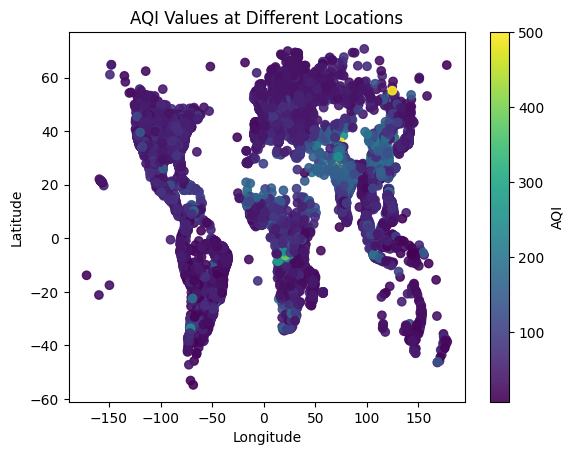

In [ ]:
# First Dataset
# Summary
summary = firstDataset[['AQI Value', 'lng', 'lat']].describe()
print(summary)

# Visualization
plt.scatter(firstDataset['lng'], firstDataset['lat'], c=firstDataset['AQI Value'], cmap='viridis', alpha=0.9)
plt.colorbar(label='AQI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('AQI Values at Different Locations')
plt.show()

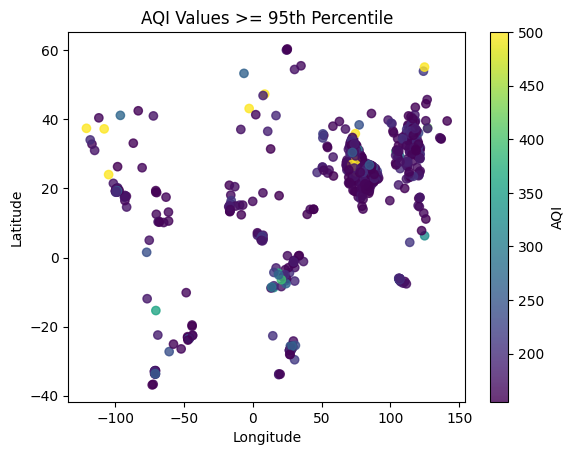

In [ ]:
# Visualization for 95th Quantile AQI Points
population_threshold = firstDataset['AQI Value'].quantile(0.95)
filtered_df = firstDataset[secondDataset['AQI Value'] >= population_threshold]
plt.scatter(filtered_df['lng'], filtered_df['lat'], c=filtered_df['AQI Value'], cmap='viridis', alpha=0.8)
plt.colorbar(label='AQI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('AQI Values >= 95th Percentile')
plt.show()

          AQI Value           lng           lat
count  16696.000000  16696.000000  16696.000000
mean      62.999760     -3.936074     30.267490
std       43.090905     73.043047     22.946753
min        7.000000   -171.750000    -54.801900
25%       38.750000    -75.178950     16.516075
50%       52.000000      5.646400     38.815550
75%       69.000000     36.285450     46.683300
max      500.000000    178.017800     70.767000


Text(0.5, 1.0, 'AQI Values and Population at Different Locations')

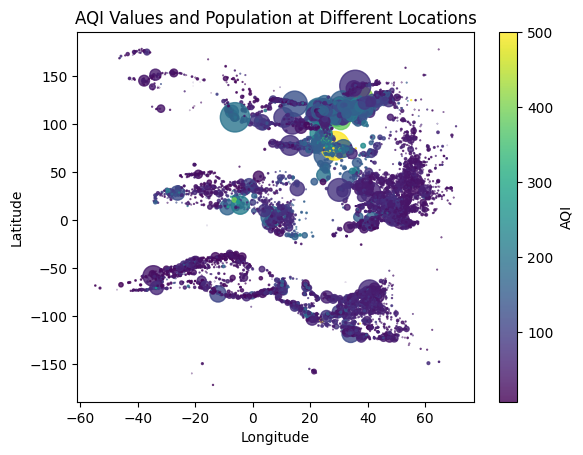

In [ ]:
# Second Dataset
# Summary
summary = secondDataset[['AQI Value', 'lng', 'lat']].describe()
print(summary)

# Visualization
point_size = secondDataset['population'] / secondDataset['population'].max() * 500  # Adjust the scaling factor as needed
plt.scatter(secondDataset['lat'], secondDataset['lng'], c=secondDataset['AQI Value'], cmap='viridis', s=point_size, alpha=0.8)
plt.colorbar(label='AQI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('AQI Values and Population at Different Locations')

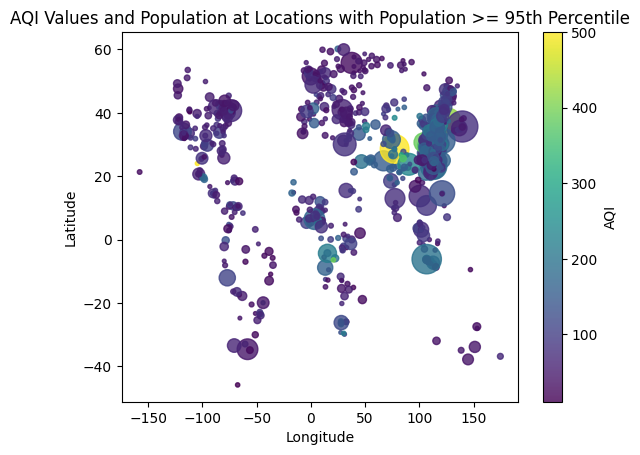

In [ ]:
# Visualization for 95th Quantile + Population Points
population_threshold = secondDataset['population'].quantile(0.95)
filtered_df = secondDataset[secondDataset['population'] >= population_threshold]
point_size = filtered_df['population'] / filtered_df['population'].max() * 500
plt.scatter(filtered_df['lng'], filtered_df['lat'], c=filtered_df['AQI Value'], cmap='viridis', s=point_size, alpha=0.8)
plt.colorbar(label='AQI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('AQI Values and Population at Locations with Population >= 95th Percentile')
plt.show()

              AQI    latitude   longitude     population  \
count  354.000000  354.000000  354.000000     354.000000   
mean    38.066363   39.199531  -94.542898   74479.355932   
std     10.618978    5.181664   15.526639  113108.431942   
min      9.870370   27.280554 -149.284329     377.000000   
25%     33.278883   35.355238 -106.400365   15403.250000   
50%     38.557675   39.784228  -90.012185   33909.000000   
75%     43.433879   42.758127  -82.501188   82003.250000   
max     85.144809   64.836531  -68.788767  856616.000000   

       Residential electricity consumption (MWh)  \
count                               3.540000e+02   
mean                                2.917865e+05   
std                                 4.653850e+05   
min                                 1.603000e+03   
25%                                 6.273100e+04   
50%                                 1.317265e+05   
75%                                 3.087565e+05   
max                                 4.69271

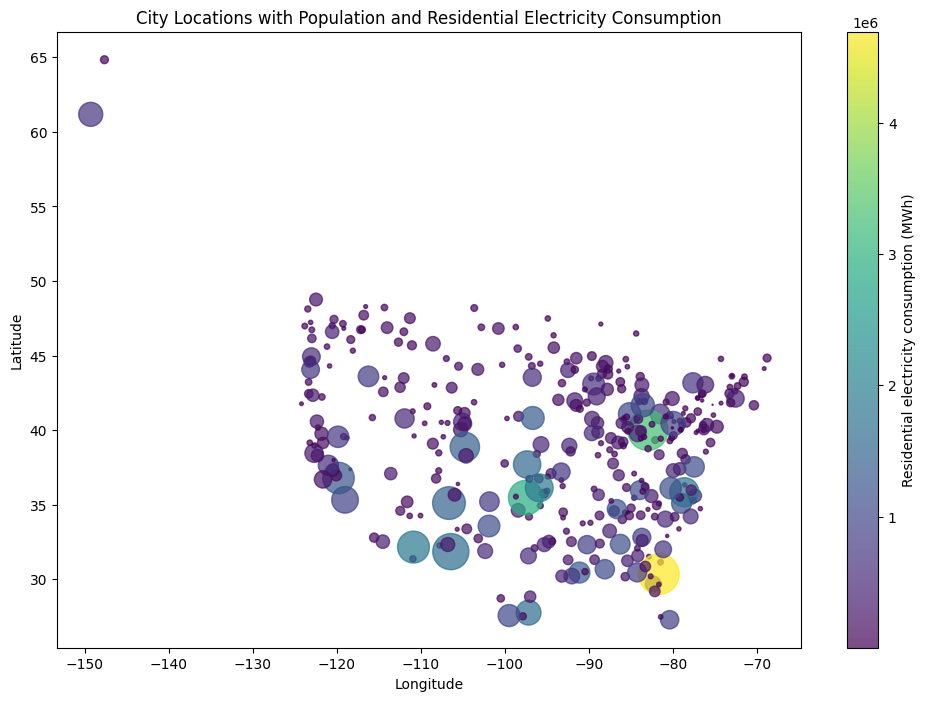

In [ ]:
# Third Dataset
# Summary
summary = thirdDataset.describe()
print(summary)

# Visualization w/ Residential Electricity Consumption
plt.figure(figsize=(12, 8))
scatter = plt.scatter(thirdDataset['longitude'], thirdDataset['latitude'], s=thirdDataset['population']/1000, c=thirdDataset['Residential electricity consumption (MWh)'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Residential electricity consumption (MWh)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations with Population and Residential Electricity Consumption')
plt.show()

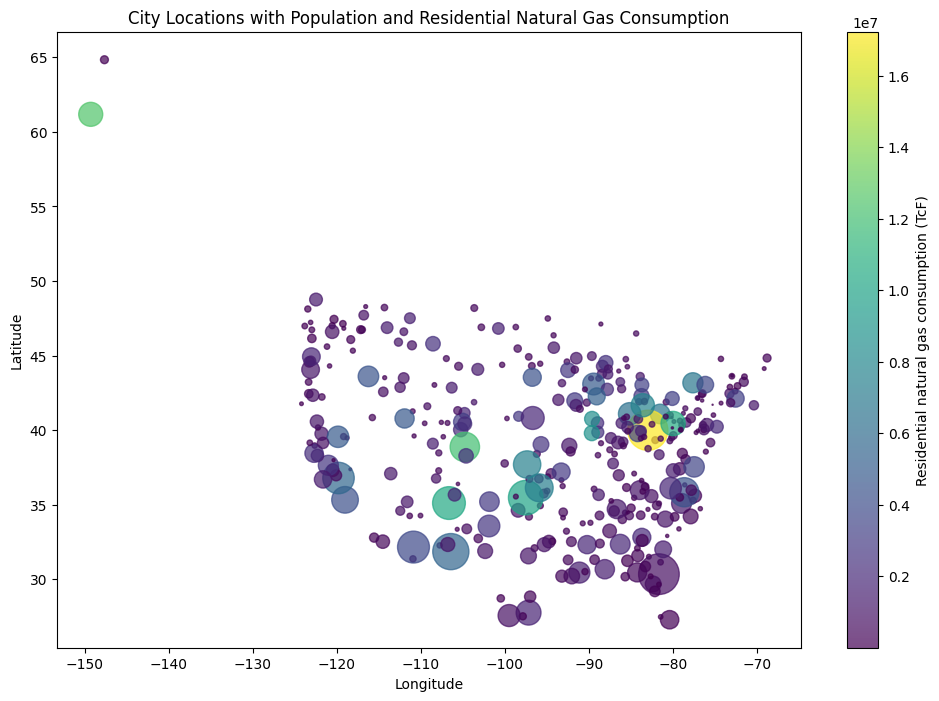

In [ ]:
# Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(thirdDataset['longitude'], thirdDataset['latitude'], s=thirdDataset['population']/1000, c=thirdDataset['Residential natural gas consumption (TcF)'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Residential natural gas consumption (TcF)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations with Population and Residential Natural Gas Consumption')
plt.show()

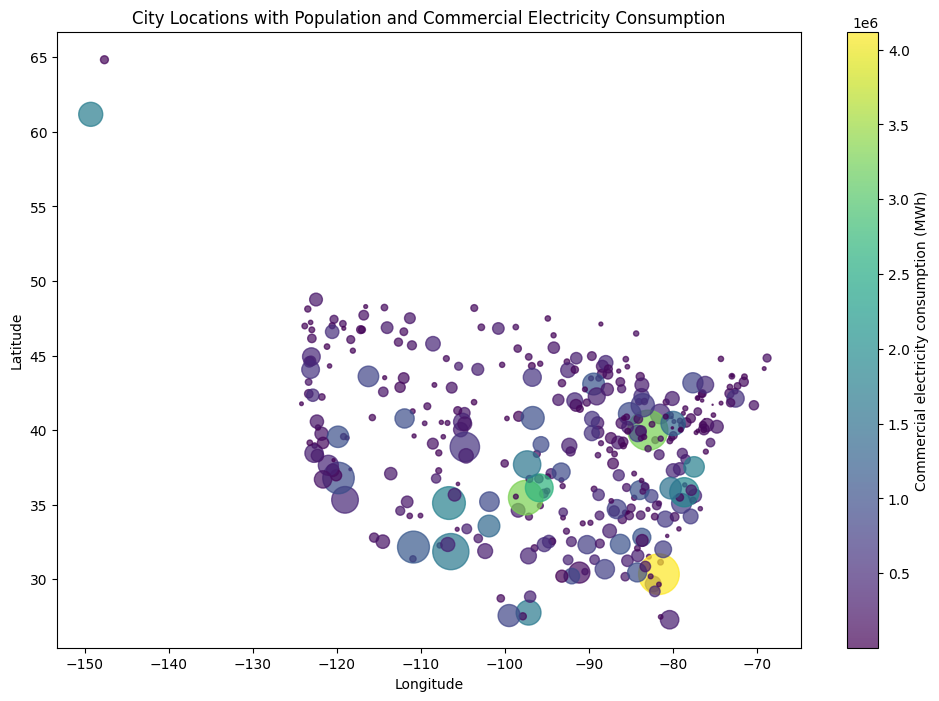

In [ ]:
# Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(thirdDataset['longitude'], thirdDataset['latitude'], s=thirdDataset['population']/1000, c=thirdDataset['Commercial electricity consumption (MWh)'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Commercial electricity consumption (MWh)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations with Population and Commercial Electricity Consumption')
plt.show()

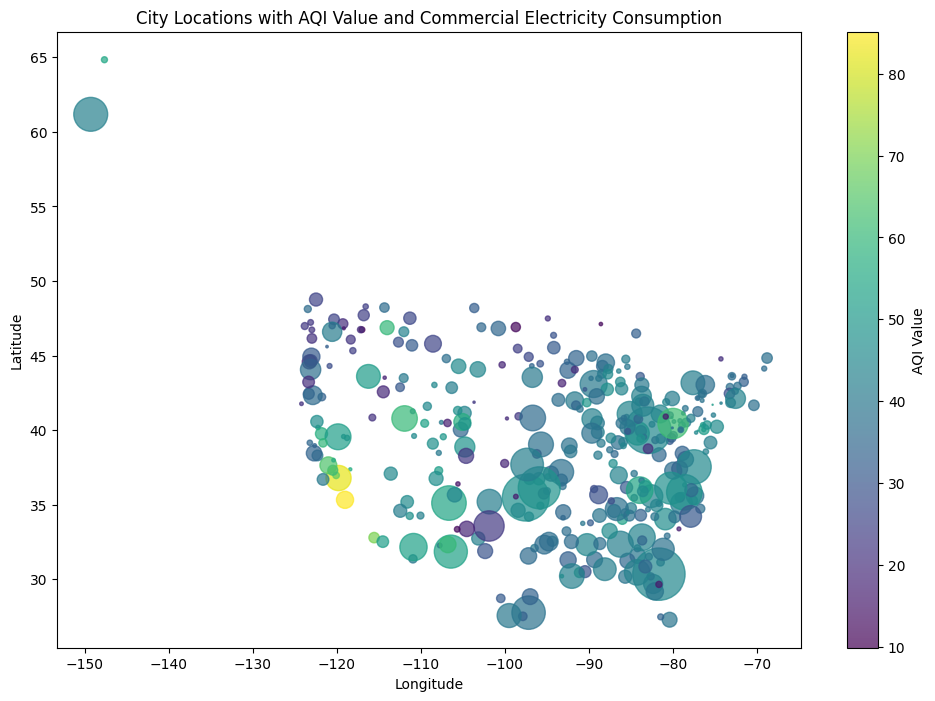

In [ ]:
# Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(thirdDataset['longitude'], thirdDataset['latitude'], s=thirdDataset['Commercial electricity consumption (MWh)'] /2900, c=thirdDataset['AQI'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='AQI Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations with AQI Value and Commercial Electricity Consumption')
plt.show()

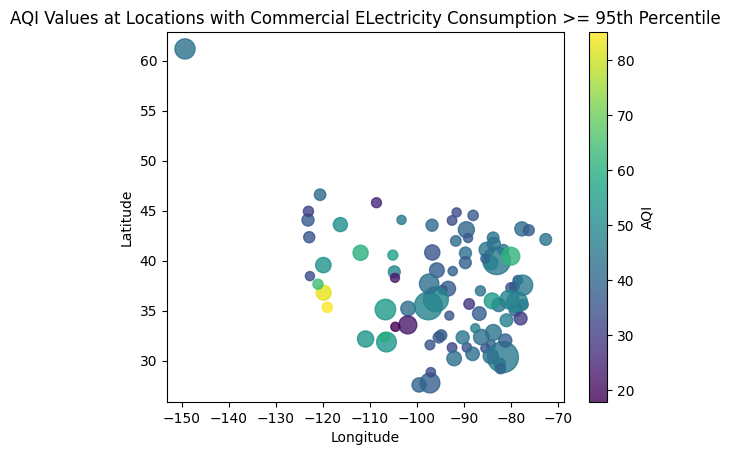

             AQI   latitude   longitude     population  \
count  89.000000  89.000000   89.000000      89.000000   
mean   42.039608  37.279729  -94.281838  200448.078652   
std    10.464327   5.403876   14.412705  165253.641094   
min    17.871795  27.560406 -149.284329   36711.000000   
25%    36.543716  32.808844 -101.886671   99329.000000   
50%    41.050279  37.076357  -91.494877  153991.000000   
75%    44.991803  40.810466  -83.694193  237121.000000   
max    85.144809  61.174250  -72.539978  856616.000000   

       Residential electricity consumption (MWh)  \
count                               8.900000e+01   
mean                                7.947291e+05   
std                                 6.924968e+05   
min                                 1.812200e+05   
25%                                 3.842800e+05   
50%                                 5.714420e+05   
75%                                 9.992350e+05   
max                                 4.692718e+06   

       R

In [ ]:
population_threshold = thirdDataset['Commercial electricity consumption (MWh)'].quantile(0.75)
filtered_df = thirdDataset[thirdDataset['Commercial electricity consumption (MWh)'] >= population_threshold]
point_size = filtered_df['Commercial electricity consumption (MWh)'] / filtered_df['Commercial electricity consumption (MWh)'].max() * 500
plt.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df['AQI'], cmap='viridis', s=point_size, alpha=0.8)
plt.colorbar(label='AQI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('AQI Values at Locations with Commercial ELectricity Consumption >= 75th Percentile')
plt.show()

print((filtered_df.describe()))

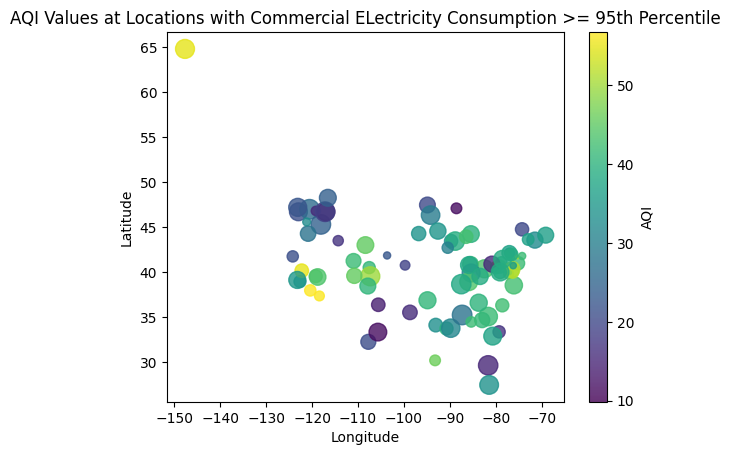

In [ ]:
consumption_threshold = thirdDataset['Commercial electricity consumption (MWh)'].quantile(0.25)
filtered_df = thirdDataset[thirdDataset['Commercial electricity consumption (MWh)'] <= consumption_threshold]
point_size = filtered_df['Commercial electricity consumption (MWh)'] / filtered_df['Commercial electricity consumption (MWh)'].max() * 200
plt.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df['AQI'], cmap='viridis', s=point_size, alpha=0.8)
plt.colorbar(label='AQI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('AQI Values at Locations with Commercial Electricity Consumption <= 25th Percentile')
plt.show()

# BASELINE

In [ ]:
# BASELINES - FIRST
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(firstDataset[['lat', 'lng']], firstDataset['AQI Value'], test_size=0.2, random_state=24)
# calculate average AQI over dataset, fill predictions accordingly
avgAQI = firstDataset['AQI Value'].mean()
baselinePrediction = np.full_like(y_test, fill_value=avgAQI)
# calculate mse and rmse
mse = mean_squared_error(y_test, baselinePrediction)
rmse = np.sqrt(mse)
# print result
print(f'FIRST DATASET Baseline Mean Squared Error: {mse}')
print(f'FIRST DATASET Baseline Root Mean Squared Error: {rmse}')

# BASELINES - SECOND (repeat first)
X_train, X_test, y_train, y_test = train_test_split(secondDataset[['lat', 'lng', 'population']], secondDataset['AQI Value'], test_size=0.2, random_state=24)
avgAQI = secondDataset['AQI Value'].mean()
baselinePrediction = np.full_like(y_test, fill_value=avgAQI)
mse = mean_squared_error(y_test, baselinePrediction)
rmse = np.sqrt(mse)
print(f'SECOND DATASET Baseline Mean Squared Error: {mse}')
print(f'SECOND DATASET Baseline Root Mean Squared Error: {rmse}')

# BASELINES - THIRD (repeat first)
X_train, X_test, y_train, y_test = train_test_split(thirdDataset[['latitude', 'longitude', 'population','Residential electricity consumption (MWh)',
                    'Residential natural gas consumption (TcF)','Commercial electricity consumption (MWh)']], thirdDataset['AQI'], test_size=0.2, random_state=24)
avgAQI = thirdDataset['AQI'].mean()
baselinePrediction = np.full_like(y_test, fill_value=avgAQI)
mse = mean_squared_error(y_test, baselinePrediction)
rmse = np.sqrt(mse)
print(f'THIRD DATASET Baseline Mean Squared Error: {mse}')
print(f'THIRD DATASET Baseline Root Mean Squared Error: {rmse}')

FIRST DATASET Baseline Mean Squared Error: 1728.5814371257486
FIRST DATASET Baseline Root Mean Squared Error: 41.576212395139464
SECOND DATASET Baseline Mean Squared Error: 1728.5814371257486
SECOND DATASET Baseline Root Mean Squared Error: 41.576212395139464
THIRD DATASET Baseline Mean Squared Error: 111.43045669559449
THIRD DATASET Baseline Root Mean Squared Error: 10.55606255644568


# FIRST DATASET WITH LINEAR REGRESSION MODEL

In [ ]:
# Drop NA rows
firstDatasetClean = firstDataset.dropna()
# Split Test, Train
pop_X_train, pop_X_test, pop_y_train, pop_y_test = sk.model_selection.train_test_split(firstDatasetClean[['lat', 'lng']], firstDatasetClean[['AQI Value']], test_size=0.2, train_size=0.8, random_state=42, shuffle=True, stratify=None)
# Linear Regression model
lr = LinearRegression()
lr.fit(pop_X_train, pop_y_train)
y_pred = lr.predict(pop_X_test)
mse = mean_squared_error(y_pred, pop_y_test)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print("coeficients of linear regression: ", lr.coef_)

Mean Squared Error: 1786.3796942164379
Root Mean Squared Error: 42.2655852226896
coeficients of linear regression:  [[-0.17273084  0.08856948]]


# FIRST DATASET WITH RANDOM FOREST MODEL

In [ ]:
# Random Forest model
rf = RandomForestRegressor(random_state=42)
pop_y_train = np.ravel(np.array(pop_y_train), order='C')
rf.fit(pop_X_train, pop_y_train)
y_pred = rf.predict(pop_X_test)
mse = mean_squared_error(y_pred, pop_y_test)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print('Feature Importance: ', rf.feature_importances_)

Mean Squared Error: 900.7546080099463
Root Mean Squared Error: 30.012574165005347
Feature Importance:  [0.45974257 0.54025743]


# FIRST DATASET WITH LIGHT GBM MODEL

In [ ]:
# Set AQI as y (labels) and the rest (latitude, longitude, population) as x (features)
X1 = firstDataset[['lat', 'lng']]  # Features
y1 = firstDataset['AQI Value']
# Split into test and train
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=24)
# Convert data into LightGBM dataset format
train1_data = lgb.Dataset(X1_train, label=y1_train)
test1_data = lgb.Dataset(X1_test, label=y1_test, reference=train1_data)

In [ ]:
# parameters
params = {
    'objective': 'regression',
    'metric': 'root_mean_squared_error',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'num_threads': 4
}

In [ ]:
# train model
num_round = 300
bst1 = lgb.train(params, train1_data, num_round, valid_sets=[test1_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 13356, number of used features: 2
[LightGBM] [Info] Start training from score 63.140162


In [ ]:
# Make predictions
y1_pred = bst1.predict(X1_test, num_iteration=bst.best_iteration)
accuracy = accuracy_score(y1_test, (y1_pred > 0.5).astype(int))
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
print(f'Mean Squared Error: {mse1}')
print(f'Root Mean Squared Error: {rmse1}')

Mean Squared Error: 911.3595790534356
Root Mean Squared Error: 30.188732650666797


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

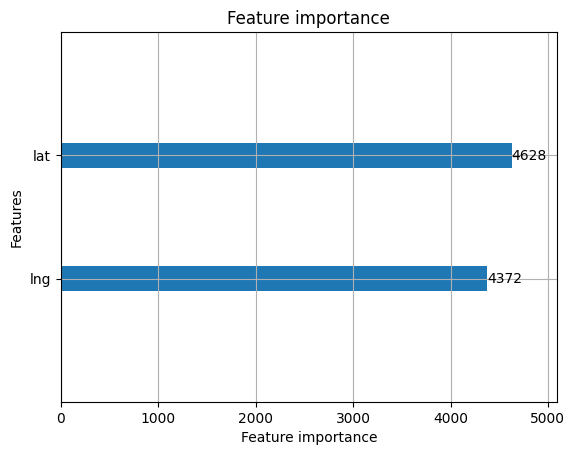

In [ ]:
# feature importance
lgb.plot_importance(bst1, max_num_features=10)

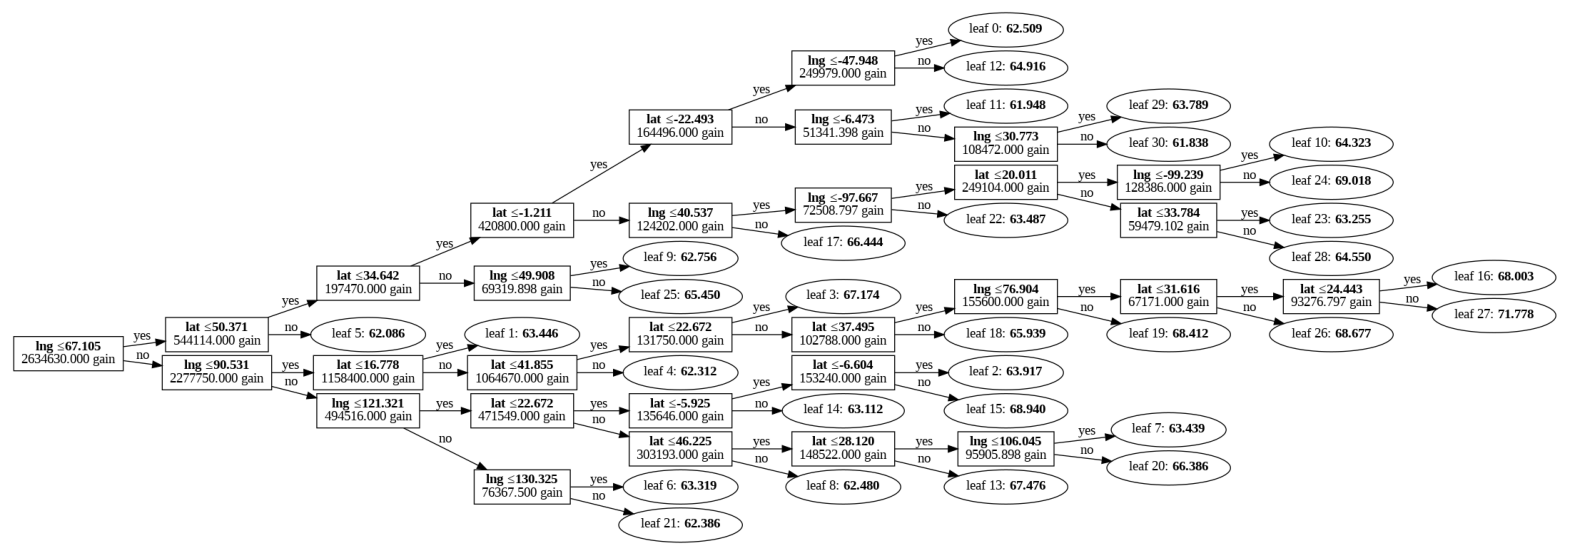

In [ ]:
tree_index = 0
lgb.plot_tree(bst1, tree_index=tree_index, figsize=(20, 10), show_info=['split_gain'])
plt.show()

# FIRST DATASET WITH K NEAREST NEIGHBORS MODEL

In [ ]:
knn_model1 = KNeighborsRegressor(n_neighbors=500)
knn_model1.fit(X1_train, y1_train)

# Step 6: Make Predictions
y1_pred = knn_model1.predict(X1_test)

# Step 7: Evaluate the Model
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
print(f'Mean Squared Error: {mse1}')
print(f'Root Mean Squared Error: {rmse1}')

Mean Squared Error: 1372.6495419454927
Root Mean Squared Error: 37.04928530951026


# SECOND DATASET WITH LINEAR REGRESSION MODEL

In [ ]:
pop_X_train, pop_X_test, pop_y_train, pop_y_test = sk.model_selection.train_test_split(firstDatasetClean[['lat', 'lng', 'population']], firstDatasetClean[['AQI Value']], test_size=0.2, train_size=0.8, random_state=42, shuffle=True, stratify=None)
# Linear Regression
lr = LinearRegression()
lr.fit(pop_X_train, pop_y_train)
y_pred = lr.predict(pop_X_test)
mse = mean_squared_error(y_pred, pop_y_test)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print("coeficients of linear regression: ", lr.coef_)

Mean Squared Error: 1713.7586227624165
Root Mean Squared Error: 41.397567836316384
coeficients of linear regression:  [[-1.64195055e-01  7.68747439e-02  6.96871346e-06]]


# SECOND DATASET WITH RANDOM FOREST MODEL

In [ ]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
pop_y_train = np.ravel(np.array(pop_y_train), order='C')
rf.fit(pop_X_train, pop_y_train)
y_pred = rf.predict(pop_X_test)
mse = mean_squared_error(y_pred, pop_y_test)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print('Feature Importance: ', rf.feature_importances_)

Mean Squared Error: 835.1579733253228
Root Mean Squared Error: 28.89909987050328
Feature Importance:  [0.3728111  0.45352022 0.17366869]


# SECOND DATASET WITH LIGHT GBM MODEL

In [ ]:
# Set AQI as y (labels) and the rest (latitude, longitude, population) as x (features)
X2 = secondDataset[['lat', 'lng', 'population']]  # Features
y2 = secondDataset['AQI Value']
# Split into test and train
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=24)
# Convert data into LightGBM dataset format
train2_data = lgb.Dataset(X2_train, label=y2_train)
test2_data = lgb.Dataset(X2_test, label=y2_test, reference=train2_data)

In [ ]:
# parameters
params = {
    'objective': 'regression',
    'metric': 'root_mean_squared_error',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'num_threads': 4
}

In [ ]:
# train model
num_round = 300
bst2 = lgb.train(params, train2_data, num_round, valid_sets=[test2_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 13356, number of used features: 3
[LightGBM] [Info] Start training from score 63.142707


In [ ]:
# Make predictions
y2_pred = bst2.predict(X2_test, num_iteration=bst2.best_iteration)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
print(f'Mean Squared Error: {mse2}')
print(f'Root Mean Squared Error: {rmse2}')

Mean Squared Error: 835.2184326567238
Root Mean Squared Error: 28.900145893346696


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

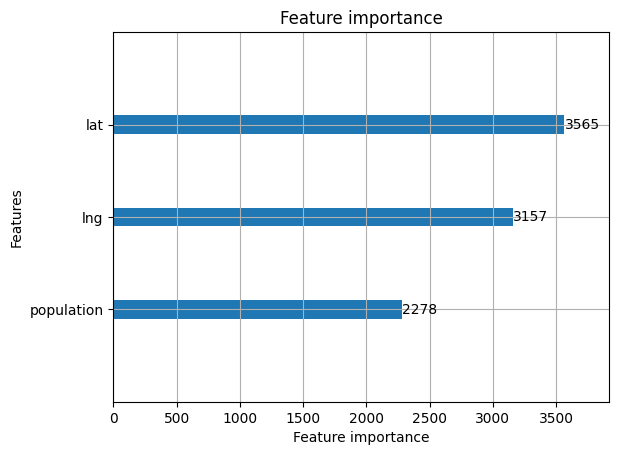

In [ ]:
# feature importance
lgb.plot_importance(bst2, max_num_features=10)

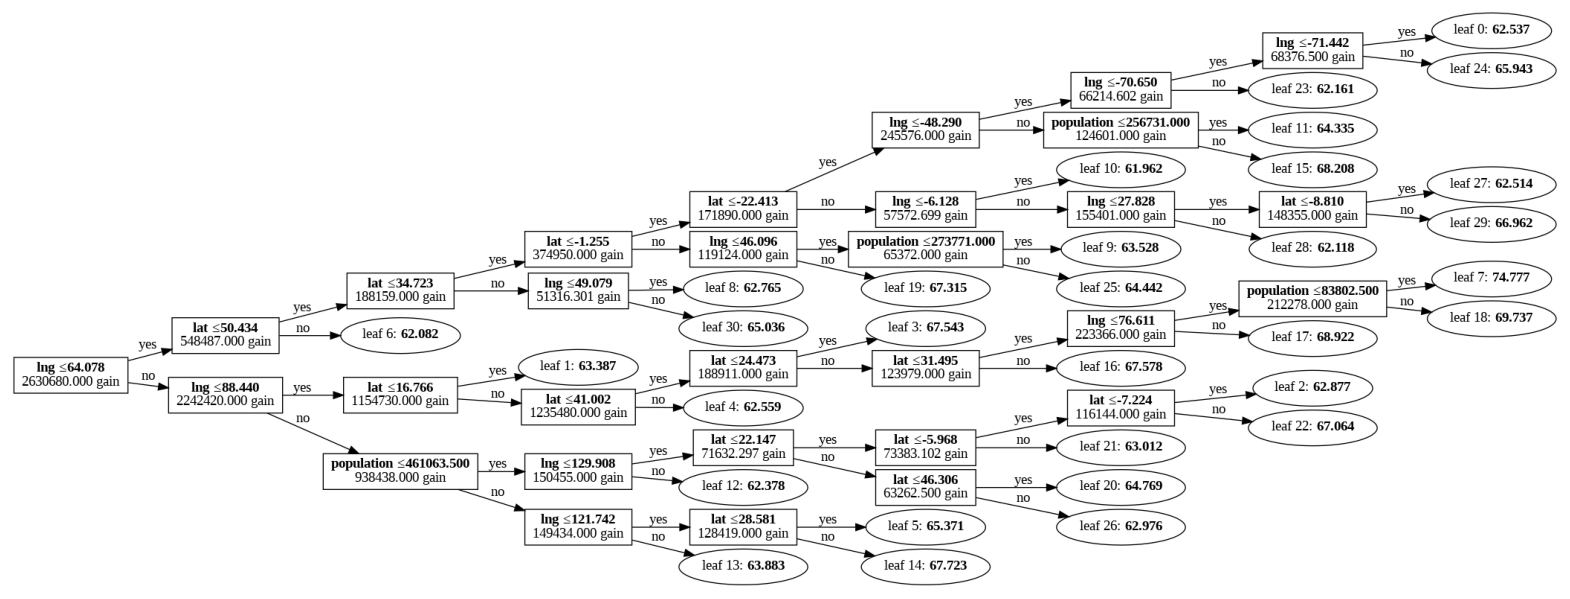

In [ ]:
tree_index = 0
lgb.plot_tree(bst2, tree_index=tree_index, figsize=(20, 10), show_info=['split_gain'])
plt.show()

# SECOND DATASET WITH K NEAREST NEIGHBORS MODEL

In [ ]:
# Drop NAN values -> removes rows which have a 'NaN' population value
secondDatasetCleaned = secondDataset.dropna()
# Set AQI as y (labels) and the rest (latitude, longitude, population) as x (features)
X22 = secondDatasetCleaned[['lat', 'lng', 'population']]  # Features
y22 = secondDatasetCleaned['AQI Value']
# Split into test and train
X22_train, X22_test, y22_train, y22_test = train_test_split(X22, y22, test_size=0.2, random_state=24)

In [ ]:
knn_model2 = KNeighborsRegressor(n_neighbors=309)
knn_model2.fit(X22_train, y22_train)

# Step 6: Make Predictions
y22_pred = knn_model2.predict(X22_test)

# Step 7: Evaluate the Model
mse22 = mean_squared_error(y22_test, y22_pred)
rmse22 = np.sqrt(mse22)
print(f'Mean Squared Error: {mse22}')
print(f'Root Mean Squared Error: {rmse22}')

Mean Squared Error: 1965.927803241018
Root Mean Squared Error: 44.33878441320892


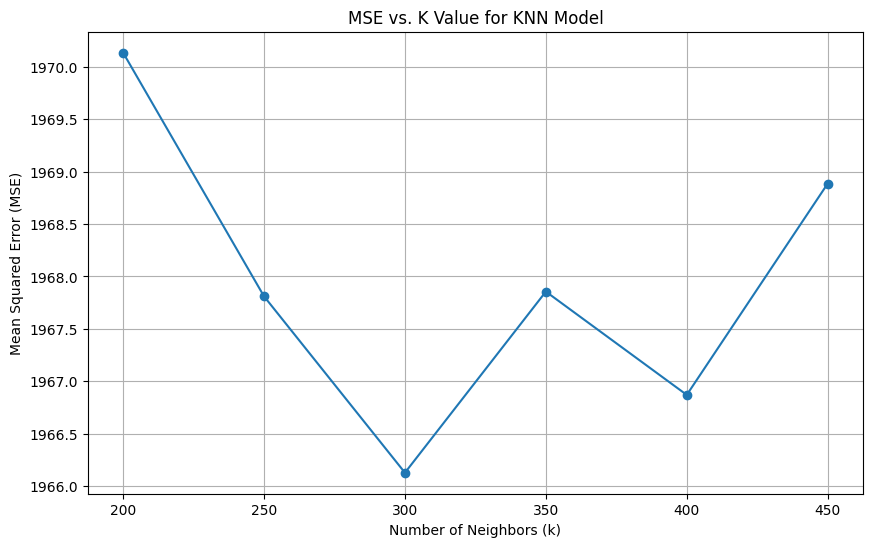

In [ ]:
k_values = np.arange(200, 500)
k_list = []
mse_list = []

# Iterate over different k values
for k in k_values:
    if k % 50 == 0:

    # Create and train the KNN model
      knn_model2 = KNeighborsRegressor(n_neighbors=k)
      knn_model2.fit(X22_train, y22_train)

    # Make predictions
      y22_pred = knn_model2.predict(X22_test)

    # Calculate MSE
      mse = mean_squared_error(y22_test, y22_pred)

    # Store k and MSE values
      k_list.append(k)
      mse_list.append(mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_list, mse_list, marker='o', linestyle='-')
plt.title('MSE vs. K Value for KNN Model')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# THIRD DATASET WITH LINEAR REGRESSION MODEL

In [ ]:
thirdDatasetClean = thirdDataset.dropna()
# Linear Regression model
# using just natural gas data yields best results
energy_X_train, energy_X_test, energy_y_train, energy_y_test = sk.model_selection.train_test_split(thirdDatasetClean[['latitude', 'longitude', 'population', 'Residential natural gas consumption (TcF)']], thirdDatasetClean[['AQI']], test_size=0.2, train_size=0.8, random_state=42, shuffle=True, stratify=None)
lr = LinearRegression()
lr.fit(energy_X_train, energy_y_train)
y_pred = lr.predict(energy_X_test)
mse = mean_squared_error(y_pred, energy_y_test)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print("coeficients of linear regression: ", lr.coef_)

Mean Squared Error: 100.85773425611337
Root Mean Squared Error: 10.042795141598447
coeficients of linear regression:  [[-4.28627962e-01 -3.52214548e-02  1.89592875e-05  6.45030230e-07]]


# THIRD DATASET WITH RANDOM FOREST MODEL

In [ ]:
# Random Forest model
# using just residential energy data yields best results
energy_X_train, energy_X_test, energy_y_train, energy_y_test = sk.model_selection.train_test_split(thirdDatasetClean[['latitude', 'longitude', 'population', 'Residential electricity consumption (MWh)']], thirdDatasetClean[['AQI']], test_size=0.2, train_size=0.8, random_state=42, shuffle=True, stratify=None)
rf = RandomForestRegressor(random_state=42)
energy_y_train = np.ravel(np.array(energy_y_train), order='C')
rf.fit(energy_X_train, energy_y_train)
y_pred = rf.predict(energy_X_test)
mse = mean_squared_error(y_pred, energy_y_test)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print('Feature Importance: ', rf.feature_importances_)

Mean Squared Error: 91.36718358142694
Root Mean Squared Error: 9.558618288300195
Feature Importance:  [0.33992252 0.34137689 0.2006403  0.11806028]


# THIRD DATASET WITH LIGHT GBM MODEL

In [ ]:
# Set AQI as y (labels) and the rest (latitude, longitude, population) as x (features)
#X3 = thirdDataset[['latitude', 'longitude', 'population','Residential electricity consumption (MWh)',
#                    'Residential natural gas consumption (TcF)','Commercial electricity consumption (MWh)']]  # Features
X3 = thirdDataset[['latitude', 'longitude', 'population',
                    'Residential natural gas consumption (TcF)']]  # Features
y3 = thirdDataset['AQI']
# Split into test and train
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=24)
# Convert data into LightGBM dataset format
train3_data = lgb.Dataset(X3_train, label=y3_train)
test3_data = lgb.Dataset(X3_test, label=y3_test, reference=train3_data)

In [ ]:
# parameters
params = {
    'objective': 'regression',
    'metric': 'root_mean_squared_error',
    'boosting_type': 'gbdt',
    'learning_rate': 0.03,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'num_threads': 3
}

In [ ]:
# train model
num_round = 300
bst3 = lgb.train(params, train3_data, num_round, valid_sets=[test3_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 283, number of used features: 4
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 38.462046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [ ]:
# Make predictions
y3_pred = bst3.predict(X3_test, num_iteration=bst3.best_iteration)
mse3 = mean_squared_error(y3_test, y3_pred)
rmse3 = np.sqrt(mse3)
print(f'Mean Squared Error: {mse3}')
print(f'Root Mean Squared Error: {rmse3}')

Mean Squared Error: 85.9975793929391
Root Mean Squared Error: 9.27348798419123


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

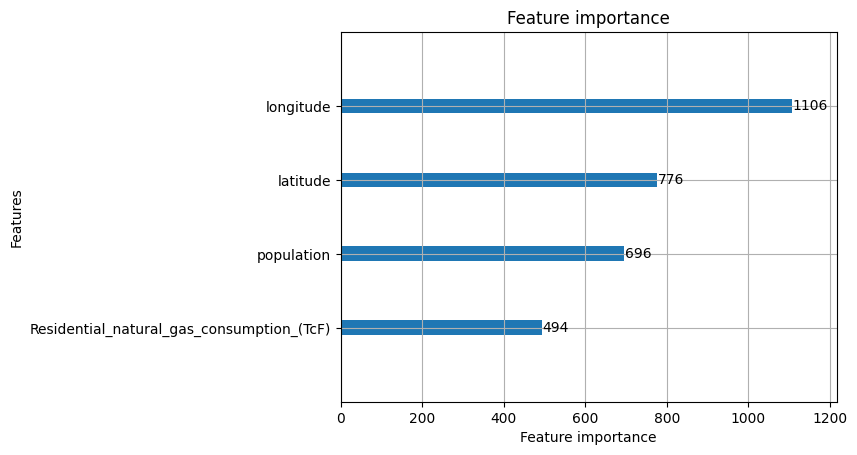

In [ ]:
# feature importance
lgb.plot_importance(bst3, max_num_features=10)

# THIRD DATASET WITH K NEAREST NEIGHBORS MODEL

In [ ]:
# Drop NAN values -> removes rows which have a 'NaN' population value
thirdDatasetCleaned = thirdDataset.dropna()
# Set AQI as y (labels) and the rest (latitude, longitude, population, energy consumption) as x (features)
X32 = thirdDatasetCleaned[['latitude', 'longitude', 'population','Residential electricity consumption (MWh)',
                    'Residential natural gas consumption (TcF)','Commercial electricity consumption (MWh)']]  # Features
y32 = thirdDatasetCleaned['AQI']
# Split into test and train
X32_train, X32_test, y32_train, y32_test = train_test_split(X32, y32, test_size=0.2, random_state=24)

In [ ]:
knn_model3 = KNeighborsRegressor(n_neighbors=78)
knn_model3.fit(X32_train, y32_train)

# Step 6: Make Predictions
y32_pred = knn_model3.predict(X32_test)

# Step 7: Evaluate the Model
mse32 = mean_squared_error(y32_test, y32_pred)
rmse32 = np.sqrt(mse32)
print(f'Mean Squared Error: {mse32}')
print(f'Root Mean Squared Error: {rmse32}')

Mean Squared Error: 99.5182225841402
Root Mean Squared Error: 9.975882045420354


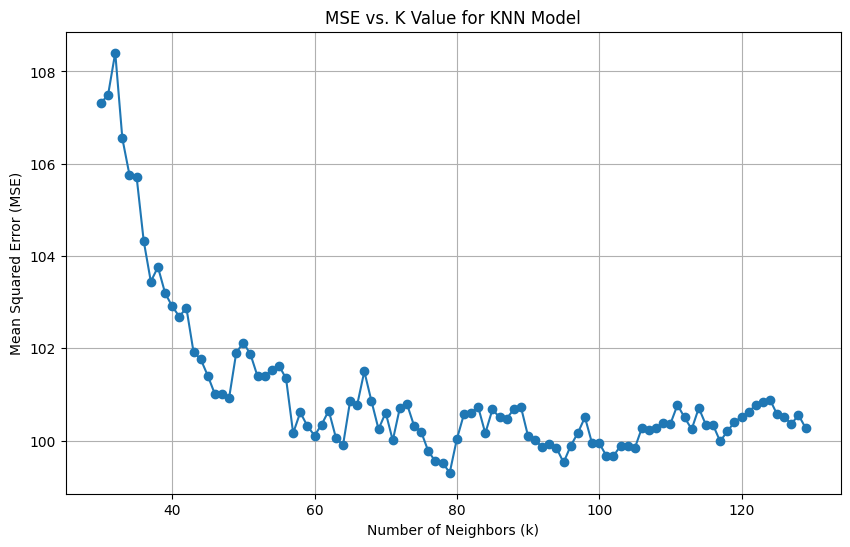

In [ ]:
k_values = np.arange(30, 130) #70,150
k_list = []
mse_list = []

# Iterate over different k values
for k in k_values:
    if k % 1 == 0: #10

    # Create and train the KNN model
      knn_model3 = KNeighborsRegressor(n_neighbors=k)
      knn_model3.fit(X32_train, y32_train)

    # Make predictions
      y32_pred = knn_model3.predict(X32_test)

    # Calculate MSE
      mse = mean_squared_error(y32_test, y32_pred)

    # Store k and MSE values
      k_list.append(k)
      mse_list.append(mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_list, mse_list, marker='o', linestyle='-')
plt.title('MSE vs. K Value for KNN Model')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()